# **KLASIFIKASI JENIS PENYAKIT DAUN JAGUNG MENGGUNAKAN ALGORITMA DEEP LEARNING RESNET101**

# MEMPERSIAPKAN IMAGE DATASET

In [ ]:
#Import Library OS/Zipfile

#import zipfile

#local_zip = '/content/drive/MyDrive/Jurnal/penyakit_daun_jagung/train.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/content/drive/MyDrive/Jurnal/penyakit_daun_jagung')

#local_zip = '/content/drive/MyDrive/Jurnal/penyakit_daun_jagung/valid.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/content/drive/MyDrive/Jurnal/penyakit_daun_jagung')
#zip_ref.close()

In [ ]:
#train
#import os
#train_Blight_dir = os.path.join('/content/drive/MyDrive/Jurnal/penyakit_daun_jagung/train/Blight')
#train_Gray_Leaf_Spot_dir = os.path.join('/content/drive/MyDrive/Jurnal/penyakit_daun_jagung/train/Gray_Leaf_Spot')
#train_Healthy_dir = os.path.join('/content/drive/MyDrive/Jurnal/penyakit_daun_jagung/train/Healthy')

#validation
#valid_Blight_dir = os.path.join('/content/drive/MyDrive/Jurnal/penyakit_daun_jagung/valid/Blight')
#valid_Gray_Leaf_Spot_dir = os.path.join('/content/drive/MyDrive/Jurnal/penyakit_daun_jagung/valid/Gray_Leaf_Spot')
#valid_Healthy_dir = os.path.join('/content/drive/MyDrive/Jurnal/penyakit_daun_jagung/valid/Healthy')

In [ ]:
#train_Blight_names = os.listdir(train_Blight_dir)
#train_Gray_Leaf_Spot_names = os.listdir(train_Gray_Leaf_Spot_dir)
#train_Healthy_names = os.listdir(train_Healthy_dir)

#validation_Blight_names = os.listdir(valid_Blight_dir)
##validation_Gray_Leaf_Spot_names = os.listdir(valid_Gray_Leaf_Spot_dir)
#validation_Healthy_names = os.listdir(valid_Healthy_dir)

In [ ]:
#print('total training Blight images:', len(os.listdir(train_Blight_dir)))
##print('total training Gray_Leaf_Spot images:', len(os.listdir(train_Gray_Leaf_Spot_dir)))
#print('total training Healthy images:', len(os.listdir(train_Healthy_dir)))

#print('total validation Blight images:', len(os.listdir(valid_Blight_dir)))
#print('total validation Gray_Leaf_Spot images:', len(os.listdir(valid_Gray_Leaf_Spot_dir)))
#print('total validation Healthy images:', len(os.listdir(valid_Healthy_dir)))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Exploration

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import os

In [3]:
!pip install split_folders

In [4]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/Jurnal/jagung', 
                    output="/content/drive/MyDrive/Jurnal/jagung/data", seed=1337, ratio=(.8, .1, .1))


Copying files: 1510 files [00:31, 47.87 files/s]


In [2]:
os.listdir('/content/drive/MyDrive/Jurnal/jagung/data')

['train', 'val', 'test']

In [3]:
base_path = "/content/drive/MyDrive/Jurnal/jagung/data"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

In [4]:
list_corn = os.listdir(test_path)
list_corn

['Blight', 'Gray_Leaf_Spot', 'Healthy']

In [5]:
corn_path =[]
for corn in list_corn:
  dir = os.path.join(f'/content/drive/MyDrive/Jurnal/jagung/{corn}')
  corn_path.append(dir)
  print(f'Jumlah image corn {corn} : {len(os.listdir(dir))}')

Jumlah image corn Blight : 500
Jumlah image corn Gray_Leaf_Spot : 500
Jumlah image corn Healthy : 510


In [31]:
corn_path =[]
for corn in list_corn:
  dir = os.path.join(f'/content/drive/MyDrive/Jurnal/jagung/data/test/{corn}')
  corn_path.append(dir)

corn_path

['/content/drive/MyDrive/Jurnal/jagung/data/test/Blight',
 '/content/drive/MyDrive/Jurnal/jagung/data/test/Gray_Leaf_Spot',
 '/content/drive/MyDrive/Jurnal/jagung/data/test/Healthy']

In [32]:
test_path

'/content/drive/MyDrive/Jurnal/jagung/data/test'

In [33]:
categories = []
names = []

for i in range(3):
  for corn in os.listdir(corn_path[i]):
    if corn in names:
      names.remove(corn)
      categories.remove(i)
    else:
      names.append(corn)
      categories.append(i)
    
df_test = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_test

,filename,category
0,Corn_Blight (171).JPG,0
1,Corn_Blight (415).jpg,0
2,Corn_Blight (291).JPG,0
3,Corn_Blight (537).JPG,0
4,Corn_Blight (120).JPG,0
...,...,...
146,Corn_Health (259).jpg,2
147,Corn_Health (417).jpg,2
148,Corn_Health (336).jpg,2
149,Corn_Health (66).jpg,2


In [34]:
df_test.to_csv('/content/drive/MyDrive/Jurnal/jagung/test_corn.csv')

# Data Preprocessing

Menggunakan `keras.preprocessing.image.ImageDataGenerator` class untuk membuat  train and validation dataset dan normalize data. 



In [8]:
# Ketik code di atas di sini
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi training dataset
train_datagen = ImageDataGenerator(rescale = 1.0/255., rotation_range = 20,
                                    #width_shift_range = 8.2, height_shift_range= 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

# validation dataset tidak erlu augmentasi
validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

 # Mengatur target size gambar berukuran sebesar 224 x 224 15 
train_generator = train_datagen.flow_from_directory(
                                    train_path,
                                    classes=['Blight', 'Gray_Leaf_Spot', 'Healthy'],
                                    target_size=(224, 224), #ubah ke 224 
                                    batch_size=32,
                                    class_mode="categorical")

validation_generator =  validation_datagen.flow_from_directory(
          validation_path,
          classes=['Blight', 'Gray_Leaf_Spot', 'Healthy'], 
          target_size=(224, 224), # Ubah ke 224
          batch_size=32,
          class_mode='categorical',
          shuffle=False)

Found 1208 images belonging to 3 classes.
Found 151 images belonging to 3 classes.


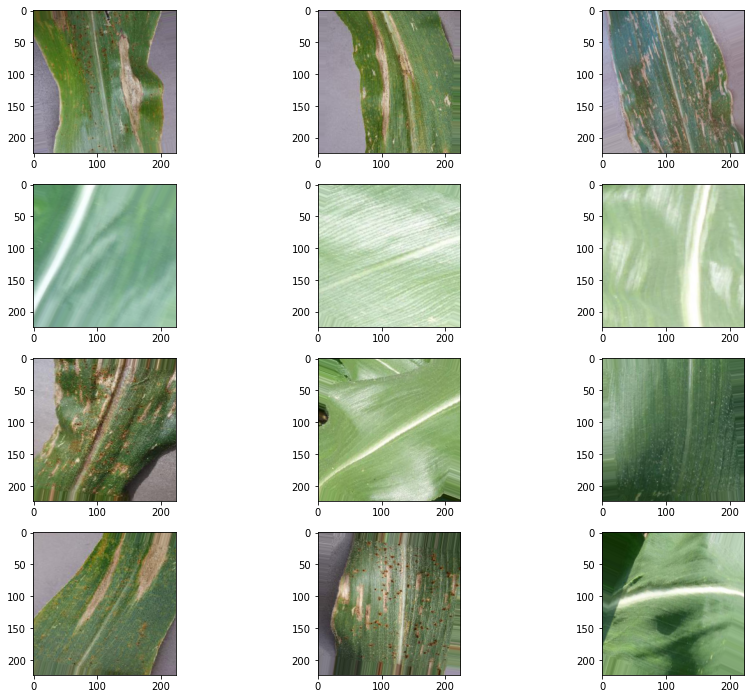

In [9]:
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#MODELING

In [10]:
from tensorflow.keras import layers
import tensorflow as tf

base_model = tf.keras.applications.densenet.DenseNet121(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet')

#base_model = ResNet50(input_shape=(224, 224, 3), include_top=True, weights='imagenet')

In [11]:
# Ketik code di atas di sini
for layer in base_model.layers:
  layer.trainable = False

In [12]:
# Ketik code di atas di sini

# Flattening
x = layers.Flatten()(base_model.output)

# Fullt Connected Layer
x = layers.Dense(512, activation='relu')(x)

# Dropout
x = layers.Dropout(0.5)(x)

# Menambahkan layer output dengan fungsi sigmoid untuk klasifikasi
x = layers.Dense(3, activation='sigmoid')(x)

model = tf.keras.Model(base_model.input, x)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',metrics=['acc'])

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/Jurnal/model/model_jurnal.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [15]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=10, epochs=50, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 1.3608 - acc: 0.6531
Epoch 00001: val_acc improved from -inf to 0.84768, saving model to /content/drive/MyDrive/Jurnal/model/model_jurnal.h5
10/10 [==============================] - 24s 1s/step - loss: 1.3608 - acc: 0.6531 - val_loss: 0.5719 - val_acc: 0.8477
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.6101 - acc: 0.8173
Epoch 00002: val_acc did not improve from 0.84768
10/10 [==============================] - 9s 931ms/step - loss: 0.6101 - acc: 0.8173 - val_loss: 0.5045 - val_acc: 0.8477
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.5965 - acc: 0.8344
Epoch 00003: val_acc improved from 0.84768 to 0.86755, saving model to /content/drive/MyDrive/Jurnal/model/model_jurnal.h5
10/10 [==============================] - 11s 1s/step - loss: 0.5965 - acc: 0.8344 - val_loss: 0.3530 - val_acc: 0.8675
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.6655 - acc:

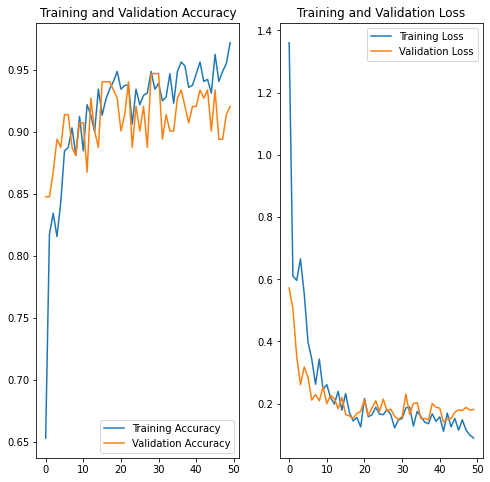

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Jurnal/model/model_jurnal.h5')

In [19]:
model.save('/content/drive/MyDrive/Jurnal/model/model_jurnal')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Jurnal/model/model_jurnal/assets


# EVALUASI

In [20]:
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

5/5 [==============================] - 4s 261ms/step - loss: 0.1595 - acc: 0.9470

 Test accuracy: 0.9470198750495911


In [22]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_corn,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 151 images belonging to 3 classes.


In [23]:
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

5/5 [==============================] - 1s 262ms/step - loss: 0.2203 - acc: 0.8874

 Test accuracy: 0.887417197227478


In [24]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [35]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/Jurnal/jagung/data_test/'
test_df = pd.read_csv('/content/drive/MyDrive/Jurnal/jagung/test_corn.csv')

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/Jurnal/jagung/test_preproc_projek.npy', test_preprocessed_images)

In [36]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

76/76 [==============================] - 9s 63ms/step
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [37]:
test_df = pd.read_csv('/content/drive/MyDrive/Jurnal/jagung/test_corn.csv')
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: category, Length: 151, dtype: int64


In [38]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [39]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[42,  8,  0],
       [ 8, 42,  0],
       [ 1,  0, 50]])

In [40]:
train_dir = '/content/drive/MyDrive/Jurnal/jagung/data/train/'
classes = os.listdir(train_dir)

In [41]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


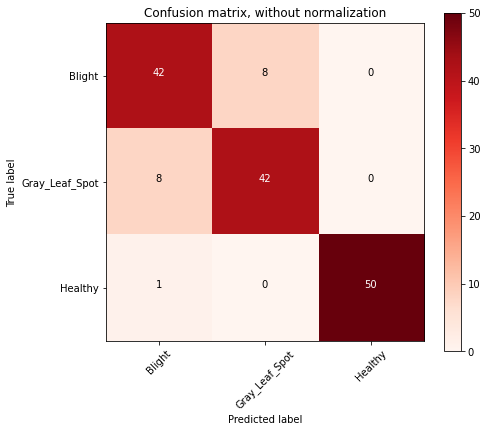

In [42]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        50
           1       0.84      0.84      0.84        50
           2       1.00      0.98      0.99        51

    accuracy                           0.89       151
   macro avg       0.89      0.89      0.89       151
weighted avg       0.89      0.89      0.89       151

